In [1]:

import dysh

from dysh.fits.gbtfitsload import GBTFITSLoad

import matplotlib.pyplot as plt

import numpy as np

In [2]:
dysh.__version__

'0.3.0'

In [6]:
def info_printer(sb):
    print('----------------')
    print(f'length: {len(sb)}')
    for i in range(len(sb)):
        print(f'{sb[i].scan}  {sb[i].pols}  {sb[i].ifnum}')

In [3]:
infile = '/home/sdfits/TRCO_231118_C/TRCO_231118_C.raw.vegas/'


sdf = GBTFITSLoad(infile)

Loaded 2 FITS files


In [4]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6,3C286,0.0,OffOn,1,4.9,4.35,2,2,12,1,253.112151,69.946084
1,7,3C286,0.0,OffOn,2,4.9,4.35,2,2,12,1,254.898939,68.81844
2,8,3C286,0.0,OffOn,1,4.9,4.35,2,2,12,1,254.034007,69.378139
3,9,3C286,0.0,OffOn,2,4.9,4.35,2,2,12,1,255.745962,68.248724
4,10,3C286,0.0,OffOn,1,4.9,4.35,2,2,12,1,254.919011,68.807496
5,11,3C286,0.0,OffOn,2,4.9,4.35,2,2,12,1,256.565997,67.673798
6,12,3C286,0.0,OffOn,1,4.9,4.35,2,2,12,1,255.760668,68.240961
7,13,3C286,0.0,OffOn,2,4.9,4.35,2,2,12,1,257.348163,67.103195
8,14,3C286,0.0,OffOn,1,7.1,6.55,2,2,12,1,256.598036,67.653208
9,15,3C286,0.0,OffOn,2,7.1,6.55,2,2,12,1,258.128605,66.511746


In [12]:
#take two scans, get total power, pol numbers are reversed for the latter scan in the scan block
#ifnum is defaulted to 0, even if ifnum = [0,1]. Unless we explicitly say ifnum=1.

scan_nums = [17,18]

tp_sb_both = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=[0,1])
tp_sb_neither = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12])

tp_sb_if0 = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=0)
tp_sb_if1 = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=1)

print('scan  pols  ifnum')
info_printer(tp_sb_both)
info_printer(tp_sb_neither)
info_printer(tp_sb_if0)
info_printer(tp_sb_if1)

scan  pols  ifnum
----------------
length: 2
17  [0, 1]  0
18  [1, 0]  0
----------------
length: 2
17  [0, 1]  0
18  [1, 0]  0
----------------
length: 2
17  [0, 1]  0
18  [1, 0]  0
----------------
length: 2
17  [0, 1]  1
18  [1, 0]  1


In [11]:
#this time take 4 scans, get total power, pol numbers go back and forth
#ifnum is defaulted to 0, even if ifnum = [0,1]. Unless we explicitly say ifnum=1.

scan_nums = [17,18,19,20]

tp_sb_both = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=[0,1])
tp_sb_neither = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12])

tp_sb_if0 = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=0)
tp_sb_if1 = sdf.gettp(scan=scan_nums,intnum=np.r_[6:12],ifnum=1)

print('scan  pols  ifnum')
info_printer(tp_sb_both)
info_printer(tp_sb_neither)
info_printer(tp_sb_if0)
info_printer(tp_sb_if1)

scan  pols  ifnum
----------------
length: 4
17  [0, 1]  0
18  [1, 0]  0
19  [1, 0]  0
20  [0, 1]  0
----------------
length: 4
17  [0, 1]  0
18  [1, 0]  0
19  [1, 0]  0
20  [0, 1]  0
----------------
length: 4
17  [0, 1]  0
18  [1, 0]  0
19  [1, 0]  0
20  [0, 1]  0
----------------
length: 4
17  [0, 1]  1
18  [1, 0]  1
19  [1, 0]  1
20  [0, 1]  1


In [13]:
#now switch to getps, and only give one scan (expanded to one scan set under the hood)
# it correctly grabs both ifnums unless we explicitly give a single ifnum.

scan_nums = 17

tp_sb_both = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=[0,1])
tp_sb_neither = sdf.getps(scan=scan_nums,intnum=np.r_[6:12])

tp_sb_if0 = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=0)
tp_sb_if1 = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=1)

print('scan  pols  ifnum')
info_printer(tp_sb_both)
info_printer(tp_sb_neither)
info_printer(tp_sb_if0)
info_printer(tp_sb_if1)

scan  pols  ifnum
----------------
length: 2
17  [0, 1]  0
17  [0, 1]  1
----------------
length: 2
17  [0, 1]  0
17  [0, 1]  1
----------------
length: 1
17  [0, 1]  0
----------------
length: 1
17  [0, 1]  1


In [14]:
#now switch to getps, and give two scans 
#(as in the first total power example, but note that 17 & 18 are from different ps pairs)
# it grabs ifnum=0 from the first pair, and ifnum

scan_nums = [17,18]

ps_sb_both = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=[0,1])
tp_sb_neither = sdf.getps(scan=scan_nums,intnum=np.r_[6:12])

tp_sb_if0 = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=0)
tp_sb_if1 = sdf.getps(scan=scan_nums,intnum=np.r_[6:12],ifnum=1)

print('scan  pols  ifnum')
info_printer(tp_sb_both)
info_printer(tp_sb_neither)
info_printer(tp_sb_if0)
info_printer(tp_sb_if1)

scan  pols  ifnum
----------------
length: 4
17  [0, 1]  0
19  [1, 0]  0
17  [0, 1]  1
19  [1, 0]  1
----------------
length: 4
17  [0, 1]  0
19  [1, 0]  0
17  [0, 1]  1
19  [1, 0]  1
----------------
length: 2
17  [0, 1]  0
19  [1, 0]  0
----------------
length: 2
17  [0, 1]  1
19  [1, 0]  1


In [28]:
ps_sb = sdf.getps(scan=scan_nums,plnum=0)
ps_sb0 = sdf.getps(scan=scan_nums,plnum=0,ifnum=0)
ps_sb1 = sdf.getps(scan=scan_nums,plnum=0,ifnum=1)


In [19]:
len(tp_sb)

4

In [36]:
psscan = ps_sb.timeaverage(weights=None)
psscan0 = ps_sb0.timeaverage(weights=None)
psscan1 = ps_sb1.timeaverage(weights=None)

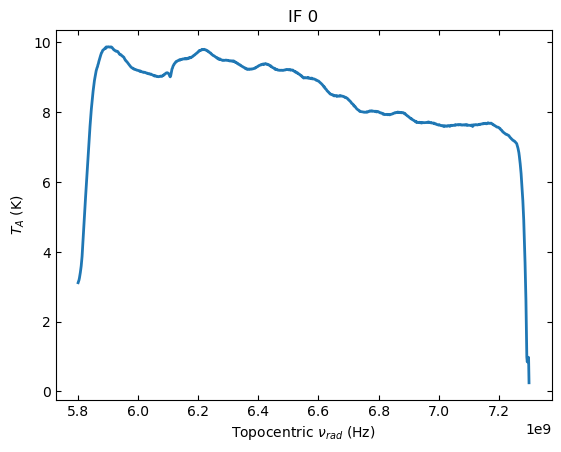

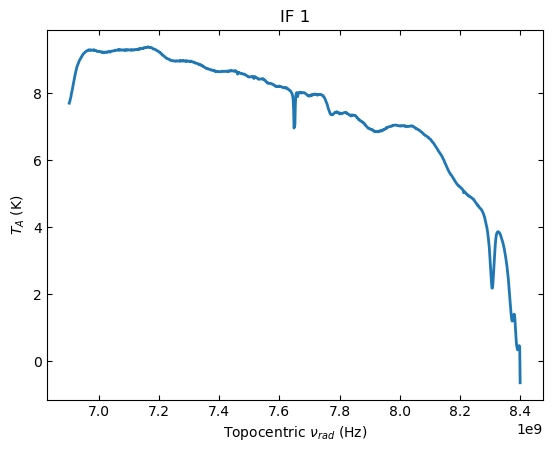

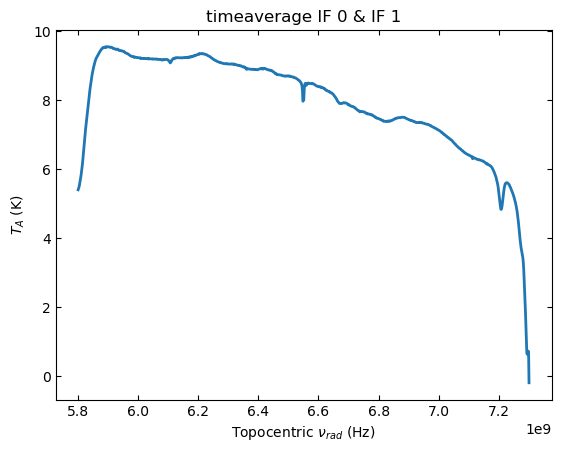

In [39]:
psscan0.plot(title='IF 0')
psscan1.plot(title='IF 1')
psscan.plot(title='timeaverage IF 0 & IF 1')

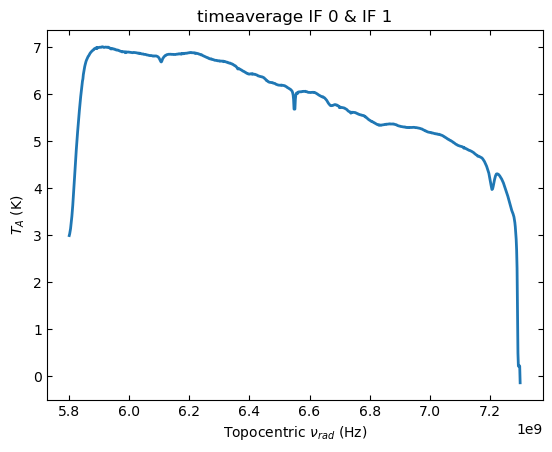

In [34]:
psscan.plot(title='timeaverage IF 0 & IF 1')

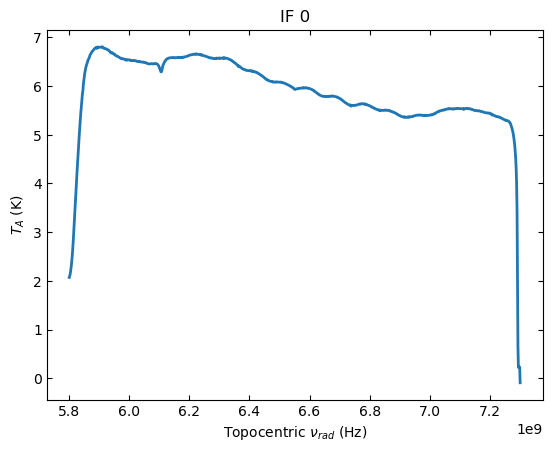

In [35]:
psscan0.plot(title='IF 0')

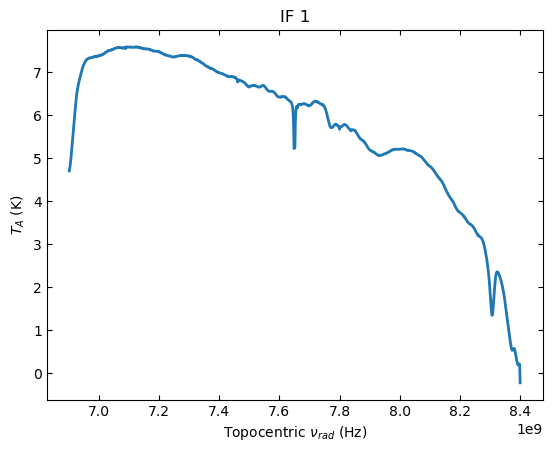

In [33]:
psscan1.plot(title='IF 1')

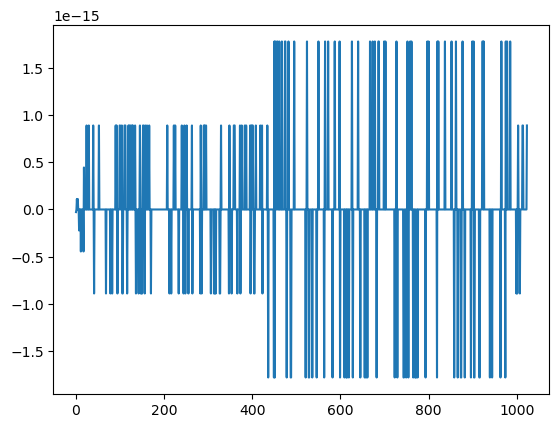

In [38]:
plt.plot(psscan.data - ((psscan0.data+psscan1.data)/2))